In [1]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from imblearn.under_sampling import RandomUnderSampler  
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from collections import Counter

import sklearn
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\Tusharika Joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv')

In [3]:
data.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0               1.0  ...   
2                     0.0                        0.0               0.0  ...   
3                     1.0                        0.0               0.0  ...   
4                     1.0                        0.0               1.0  ...   

    race     sex               income_level  marital_status  housing_status  \
0  White  Female              Below Poverty     Not Married             Own   
1  White    Male              Below Poverty     Not Married            Rent   
2  White    Male  <= $75,000, Above Poverty     Not Married             Own   
3  White  Female              Below Poverty     Not Married            Rent   
4  White  Female  <= $75,000, Above Poverty         Married             Own   

           employment                census_msa  no_of_adults  no_of_children  \
0  Not in Labor Force                   Non-MSA           0.0             0.0   
1            Employed  MSA, Not Principle  City           0.0             0.0   
2            Employed  MSA, Not Principle  City           2.0             0.0   
3  Not in Labor Force       MSA, Principle City           0.0             0.0   
4            Employed  MSA, Not Principle  City           1.0             0.0   

   h1n1_vaccine  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [4]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [5]:
data.shape

(26707, 34)

In [6]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<AxesSubplot:>

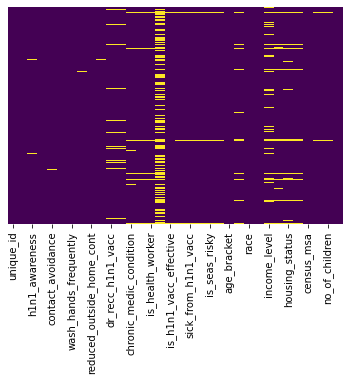

In [7]:
sn.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
def imputeNan(data, feature):
    cat_features=data.select_dtypes(include=['object'])
    numerical_features=data.select_dtypes(include=['int', 'float'])
    if feat in cat_features.columns:
        mode=data[feat].mode().values[0]
        data[feat]=data[feat].fillna(mode)
        
    elif feat in numerical_features.columns:
        median=data[feat].median()
        data[feat]=data[feat].fillna(median)

In [9]:
for feat in data.columns:
    if data[feat].isnull().sum() != 0:
        imputeNan(data, feat)

In [10]:
data.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

<AxesSubplot:>

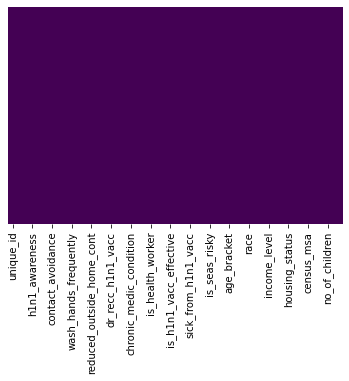

In [11]:
sn.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
data.describe(include='all')

unique_id    h1n1_worry  h1n1_awareness  antiviral_medication  \
count   26707.000000  26707.000000    26707.000000          26707.000000   
unique           NaN           NaN             NaN                   NaN   
top              NaN           NaN             NaN                   NaN   
freq             NaN           NaN             NaN                   NaN   
mean    13353.000000      1.619800        1.261392              0.048714   
std      7709.791156      0.909016        0.617047              0.215273   
min         0.000000      0.000000        0.000000              0.000000   
25%      6676.500000      1.000000        1.000000              0.000000   
50%     13353.000000      2.000000        1.000000              0.000000   
75%     20029.500000      2.000000        2.000000              0.000000   
max     26706.000000      3.000000        2.000000              1.000000   

        contact_avoidance  bought_face_mask  wash_hands_frequently  \
count        26707.000000      26707.000000           26707.000000   
unique                NaN               NaN                    NaN   
top                   NaN               NaN                    NaN   
freq                  NaN               NaN                    NaN   
mean             0.727749          0.068933               0.825888   
std              0.445127          0.253345               0.379213   
min              0.000000          0.000000               0.000000   
25%              0.000000          0.000000               1.000000   
50%              1.000000          0.000000               1.000000   
75%              1.000000          0.000000               1.000000   
max              1.000000          1.000000               1.000000   

        avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
count             26707.000000               26707.000000      26707.000000   
unique                     NaN                        NaN               NaN   
top                        NaN                        NaN               NaN   
freq                       NaN                        NaN               NaN   
mean                  0.357472                   0.336279          0.678811   
std                   0.479264                   0.472444          0.466942   
min                   0.000000                   0.000000          0.000000   
25%                   0.000000                   0.000000          0.000000   
50%                   0.000000                   0.000000          1.000000   
75%                   1.000000                   1.000000          1.000000   
max                   1.000000                   1.000000          1.000000   

        ...   race     sex               income_level  marital_status  \
count   ...  26707   26707                      26707           26707   
unique  ...      4       2                          3               2   
top     ...  White  Female  <= $75,000, Above Poverty         Married   
freq    ...  21222   15858                      17200           14963   
mean    ...    NaN     NaN                        NaN             NaN   
std     ...    NaN     NaN                        NaN             NaN   
min     ...    NaN     NaN                        NaN             NaN   
25%     ...    NaN     NaN                        NaN             NaN   
50%     ...    NaN     NaN                        NaN             NaN   
75%     ...    NaN     NaN                        NaN             NaN   
max     ...    NaN     NaN                        NaN             NaN   

        housing_status  employment                census_msa  no_of_adults  \
count            26707       26707                     26707  26707.000000   
unique               2           3                         3           NaN   
top                Own    Employed  MSA, Not Principle  City           NaN   
freq             20778       15023                     11645           NaN   
mean               NaN         NaN       

In [13]:
data.drop('unique_id', axis=1, inplace=True)

In [14]:
num_features=data.select_dtypes(include=['int', 'float'])
num_features.drop('h1n1_vaccine', axis=1, inplace=True)

In [15]:
num_features.head()

h1n1_worry  h1n1_awareness  antiviral_medication  contact_avoidance  \
0         1.0             0.0                   0.0                0.0   
1         3.0             2.0                   0.0                1.0   
2         1.0             1.0                   0.0                1.0   
3         1.0             1.0                   0.0                1.0   
4         2.0             1.0                   0.0                1.0   

   bought_face_mask  wash_hands_frequently  avoid_large_gatherings  \
0               0.0                    0.0                     0.0   
1               0.0                    1.0                     0.0   
2               0.0                    0.0                     0.0   
3               0.0                    1.0                     1.0   
4               0.0                    1.0                     1.0   

   reduced_outside_home_cont  avoid_touch_face  dr_recc_h1n1_vacc  ...  \
0                        1.0               1.0                0.0  ...   
1                        1.0               1.0                0.0  ...   
2                        0.0               0.0                0.0  ...   
3                        0.0               0.0                0.0  ...   
4                        0.0               1.0                0.0  ...   

   is_health_worker  has_health_insur  is_h1n1_vacc_effective  is_h1n1_risky  \
0               0.0               1.0                     3.0            1.0   
1               0.0               1.0                     5.0            4.0   
2               0.0               1.0                     3.0            1.0   
3               0.0               1.0                     3.0            3.0   
4               0.0               1.0                     3.0            3.0   

   sick_from_h1n1_vacc  is_seas_vacc_effective  is_seas_risky  \
0                  2.0                     2.0            1.0   
1                  4.0                     4.0            2.0   
2                  1.0                     4.0            1.0   
3                  5.0                     5.0            4.0   
4                  2.0                     3.0            1.0   

   sick_from_seas_vacc  no_of_adults  no_of_children  
0                  2.0           0.0             0.0  
1                  4.0           0.0             0.0  
2                  2.0           2.0             0.0  
3                  1.0           0.0             0.0  
4                  4.0           1.0             0.0  

[5 rows x 23 columns]

### Looking for Outliers and removing if any

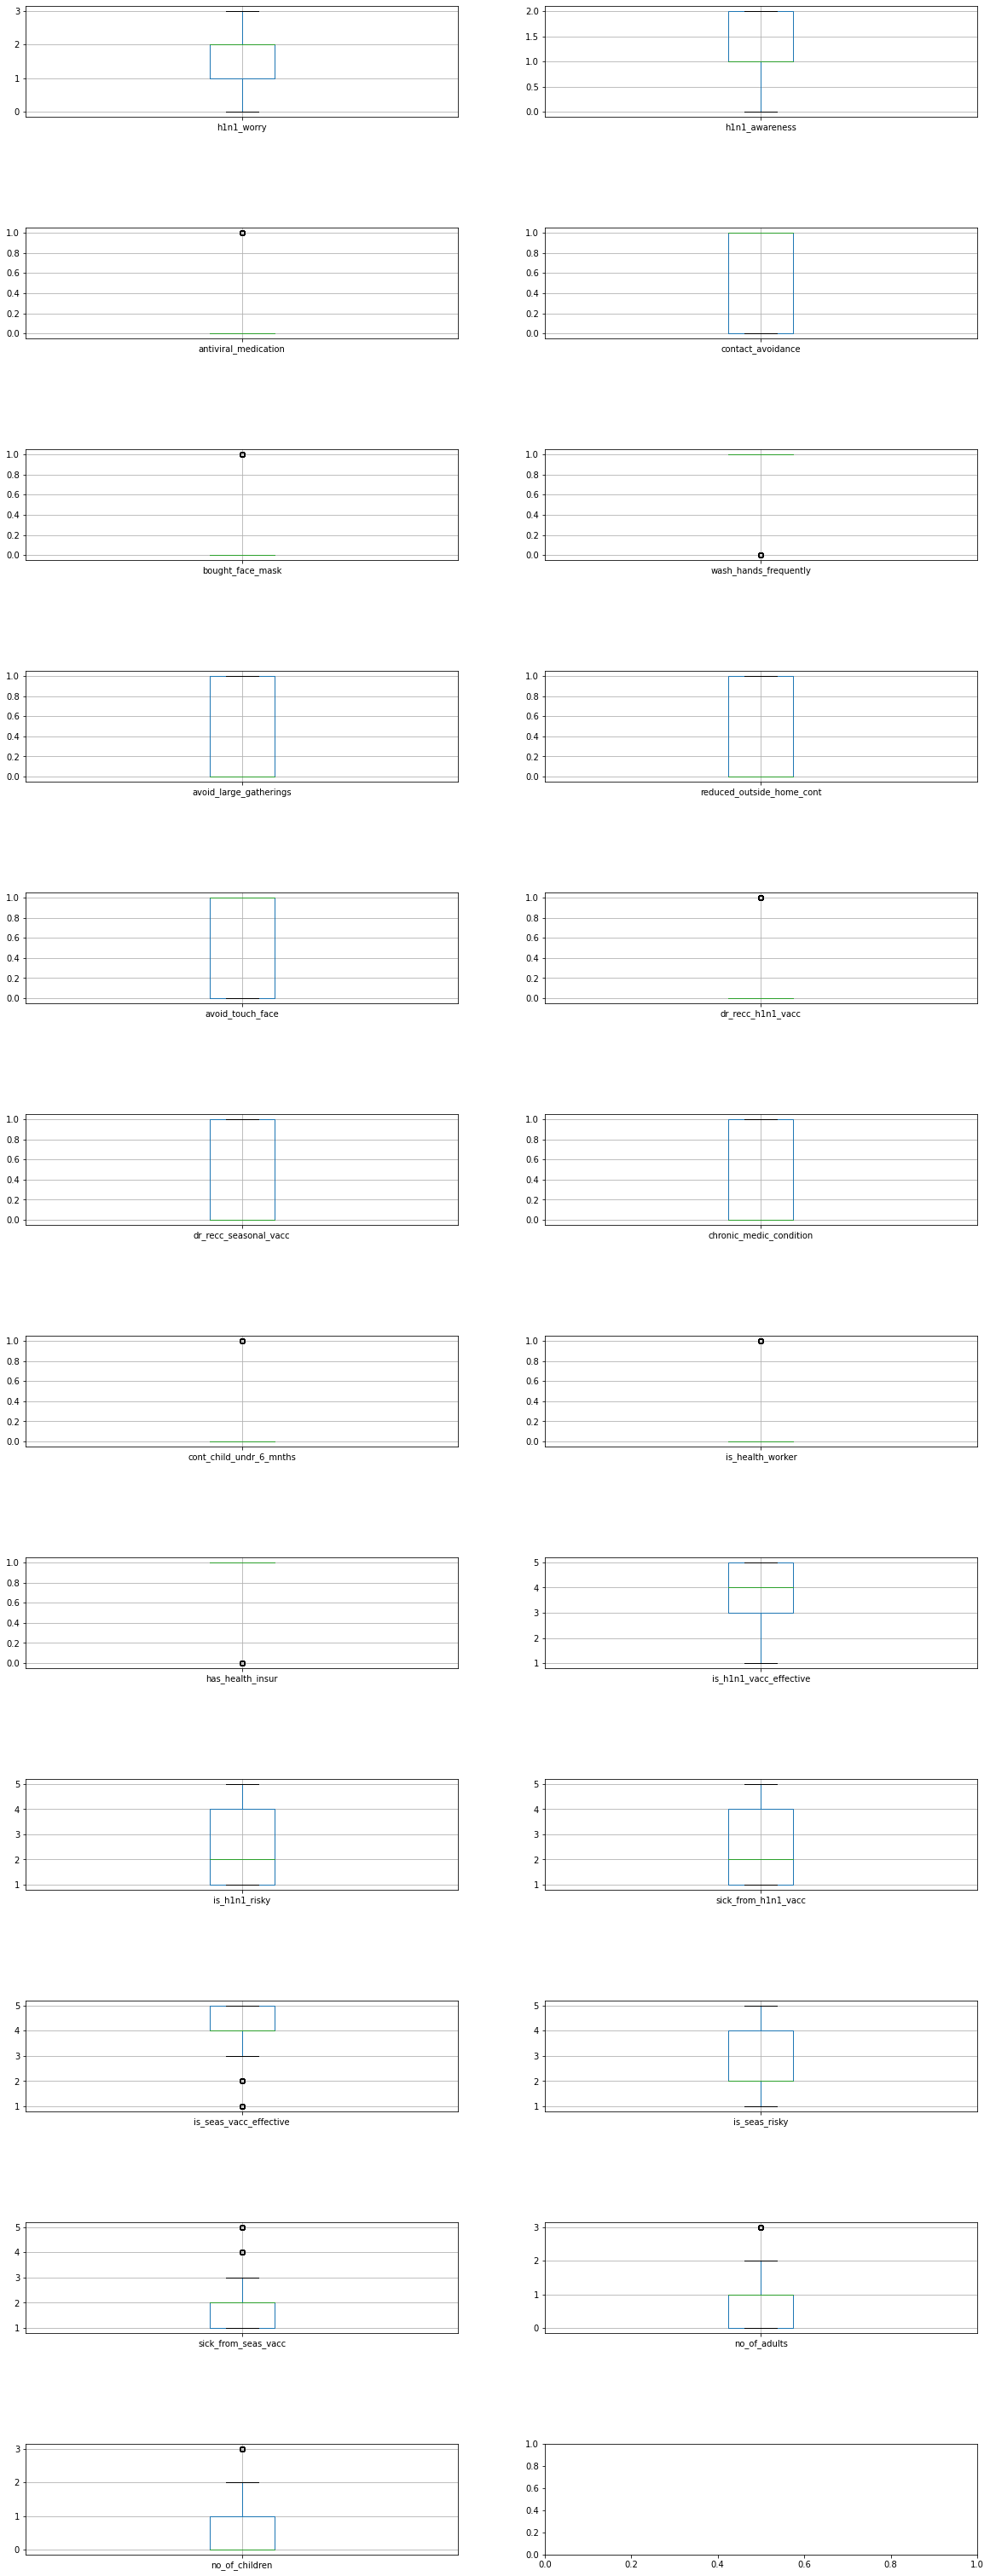

In [16]:
fig,axes = plt.subplots(12,2,figsize=(20,55))
for i, cols in enumerate(num_features):
    row, col= i//2, i%2
    num_features.boxplot(column=cols, ax=axes[row, col])
plt.subplots_adjust(hspace=1)

In [17]:
# Function for removing outliers
def remove_outlier(col):
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    return lower, upper

In [18]:
for feat in num_features.columns:
    low, high=remove_outlier(num_features[feat])
    data[feat]=np.where(num_features[feat]>high ,high,num_features[feat])
    data[feat]=np.where(num_features[feat]<low ,low,num_features[feat])

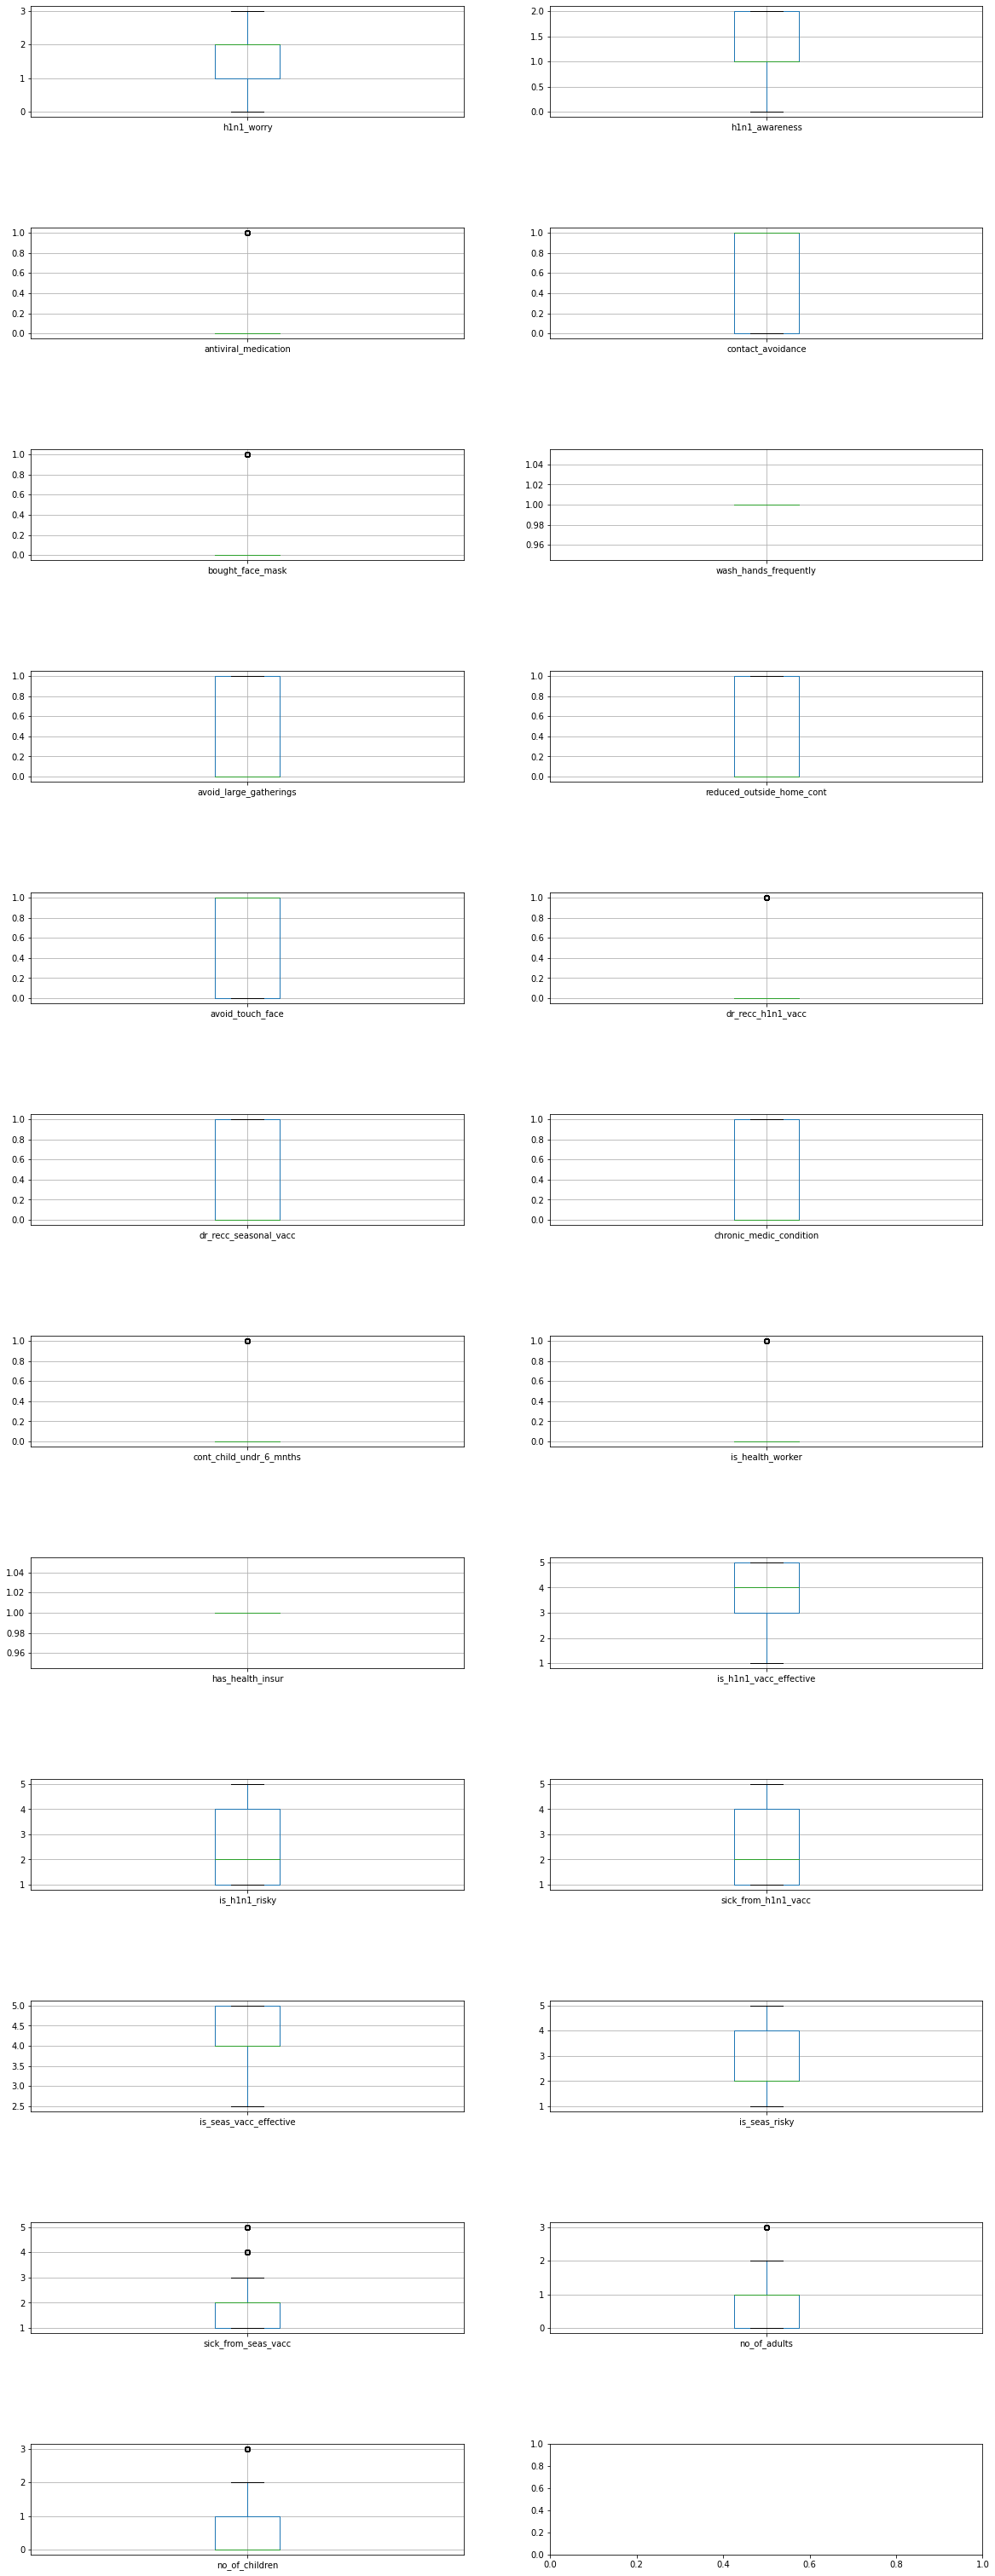

In [19]:
fig,axes = plt.subplots(12,2,figsize=(20,55))
for i, cols in enumerate(num_features):
    row, col= i//2, i%2
    data.boxplot(column=cols, ax=axes[row, col])
plt.subplots_adjust(hspace=1)

In [20]:
cat_features=data.select_dtypes(include=['object']) 

In [21]:
cat_features.head()

age_bracket     qualification   race     sex               income_level  \
0  55 - 64 Years        < 12 Years  White  Female              Below Poverty   
1  35 - 44 Years          12 Years  White    Male              Below Poverty   
2  18 - 34 Years  College Graduate  White    Male  <= $75,000, Above Poverty   
3      65+ Years          12 Years  White  Female              Below Poverty   
4  45 - 54 Years      Some College  White  Female  <= $75,000, Above Poverty   

  marital_status housing_status          employment                census_msa  
0    Not Married            Own  Not in Labor Force                   Non-MSA  
1    Not Married           Rent            Employed  MSA, Not Principle  City  
2    Not Married            Own            Employed  MSA, Not Principle  City  
3    Not Married           Rent  Not in Labor Force       MSA, Principle City  
4        Married            Own            Employed  MSA, Not Principle  City

## Data Visualization

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

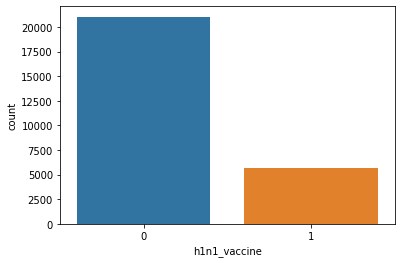

In [22]:
sn.countplot(x='h1n1_vaccine', data=data)

<AxesSubplot:xlabel='census_msa', ylabel='count'>

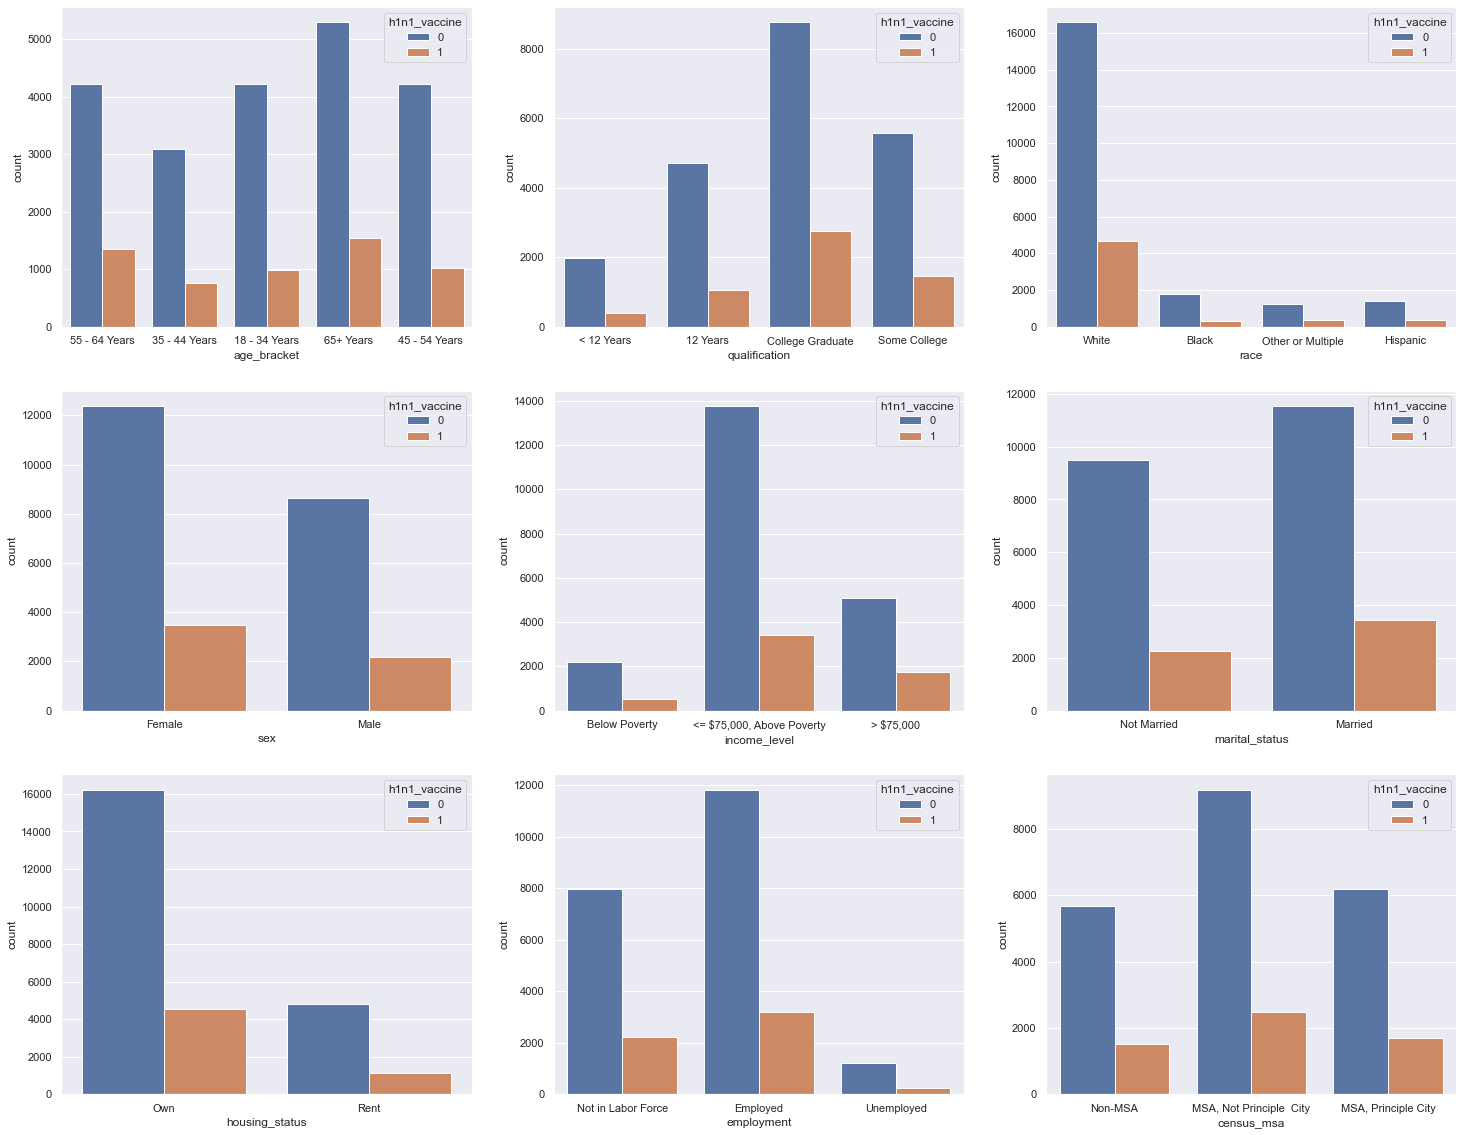

In [23]:
sn.set(rc={'figure.figsize':(25, 20)})
plt.subplot(331)
sn.countplot(x='age_bracket', hue='h1n1_vaccine', data=data)
plt.subplot(332)
sn.countplot(x='qualification', hue='h1n1_vaccine', data=data)
plt.subplot(333)
sn.countplot(x='race', hue='h1n1_vaccine', data=data)
plt.subplot(334)
sn.countplot(x='sex', hue='h1n1_vaccine', data=data)
plt.subplot(335)
sn.countplot(x='income_level', hue='h1n1_vaccine', data=data)
plt.subplot(336)
sn.countplot(x='marital_status', hue='h1n1_vaccine', data=data)
plt.subplot(337)
sn.countplot(x='housing_status', hue='h1n1_vaccine', data=data)
plt.subplot(338)
sn.countplot(x='employment', hue='h1n1_vaccine', data=data)
plt.subplot(339)
sn.countplot(x='census_msa', hue='h1n1_vaccine', data=data)

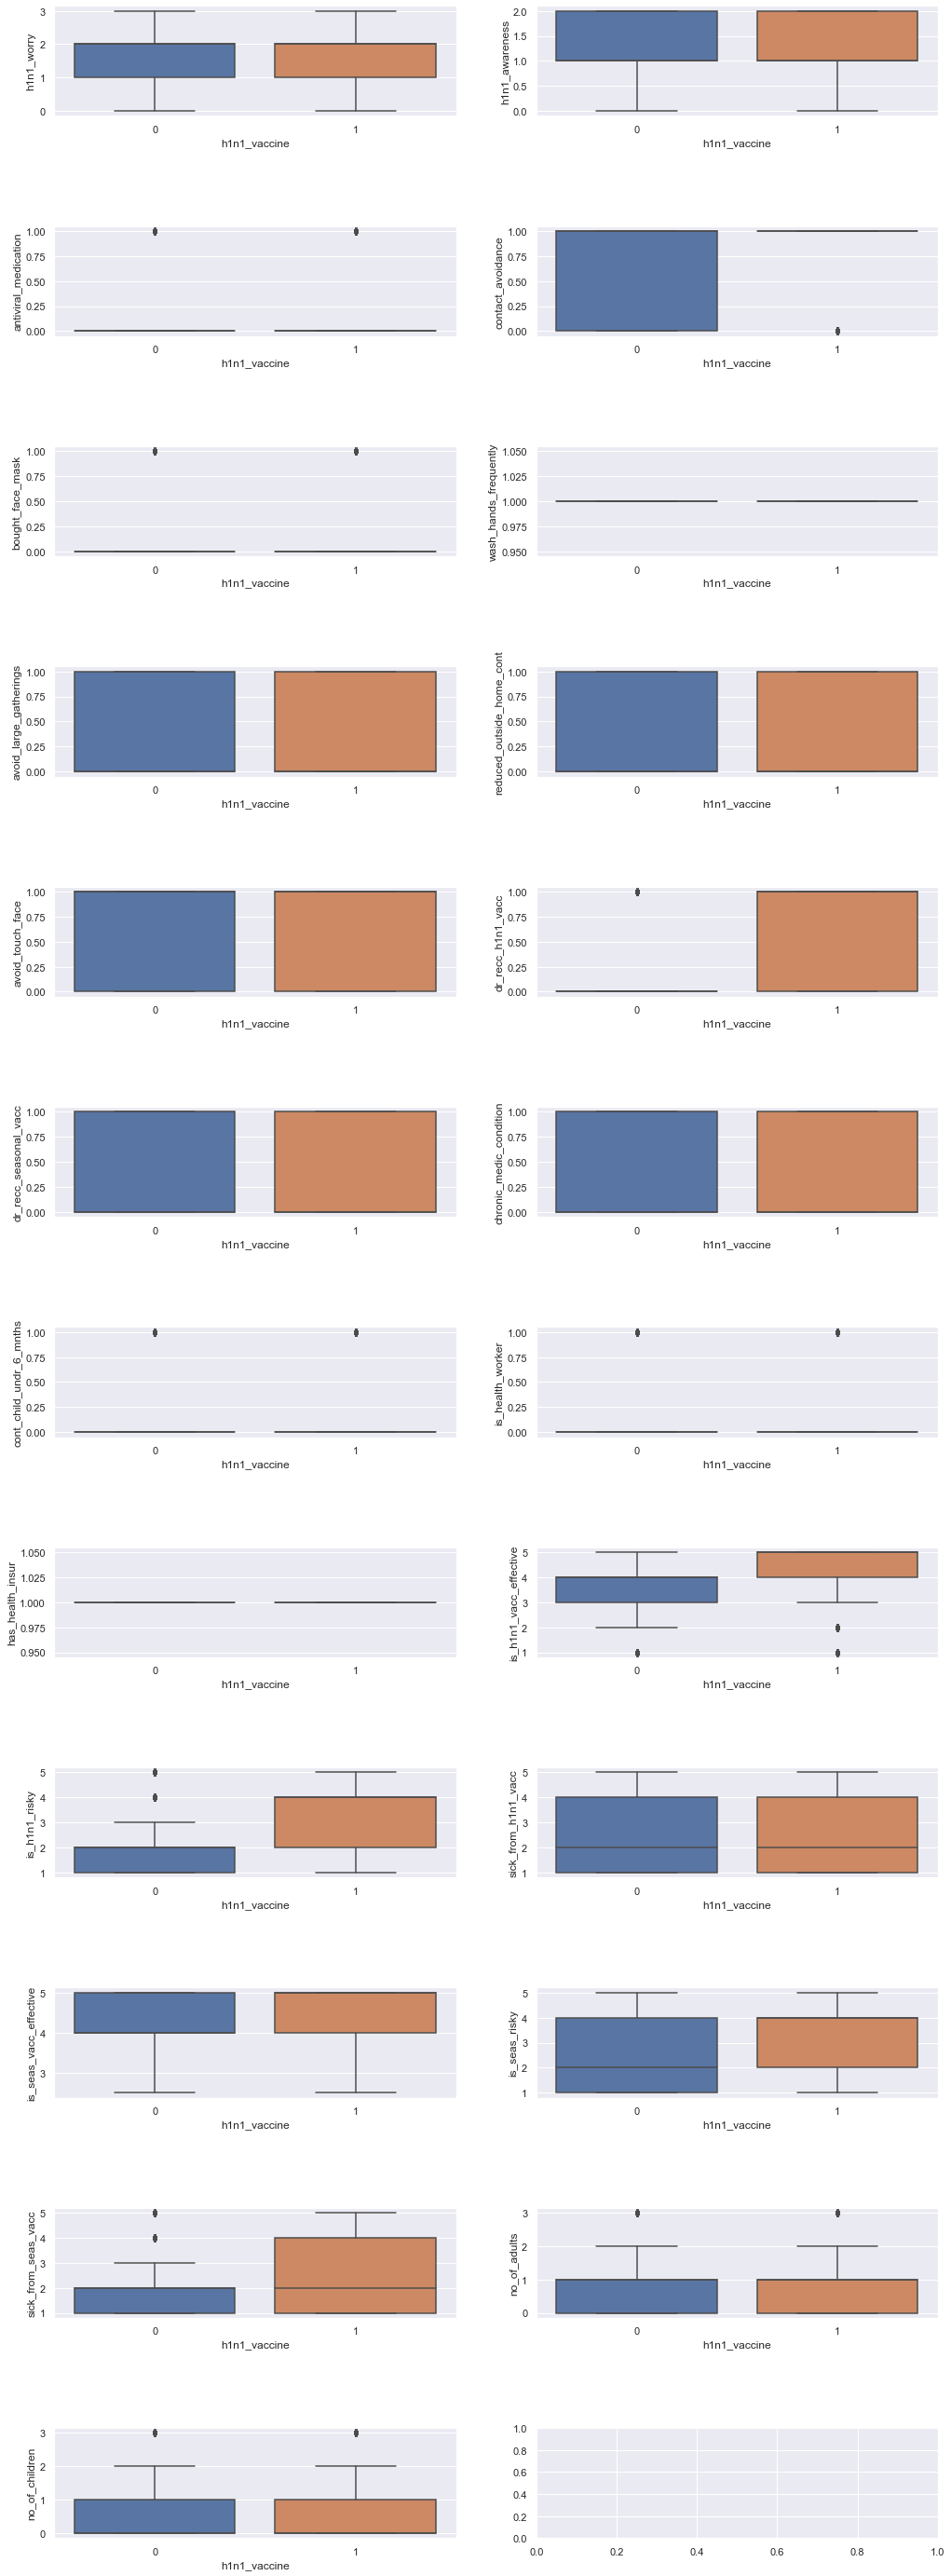

In [24]:
fig,axes = plt.subplots(12,2,figsize=(17,50))
for i, cols in enumerate(num_features):
    row, col= i//2, i%2
    sn.boxplot(y=cols, data=data, x='h1n1_vaccine', ax=axes[row, col])

#print(data[num_features.describe()])
plt.subplots_adjust(hspace=1)

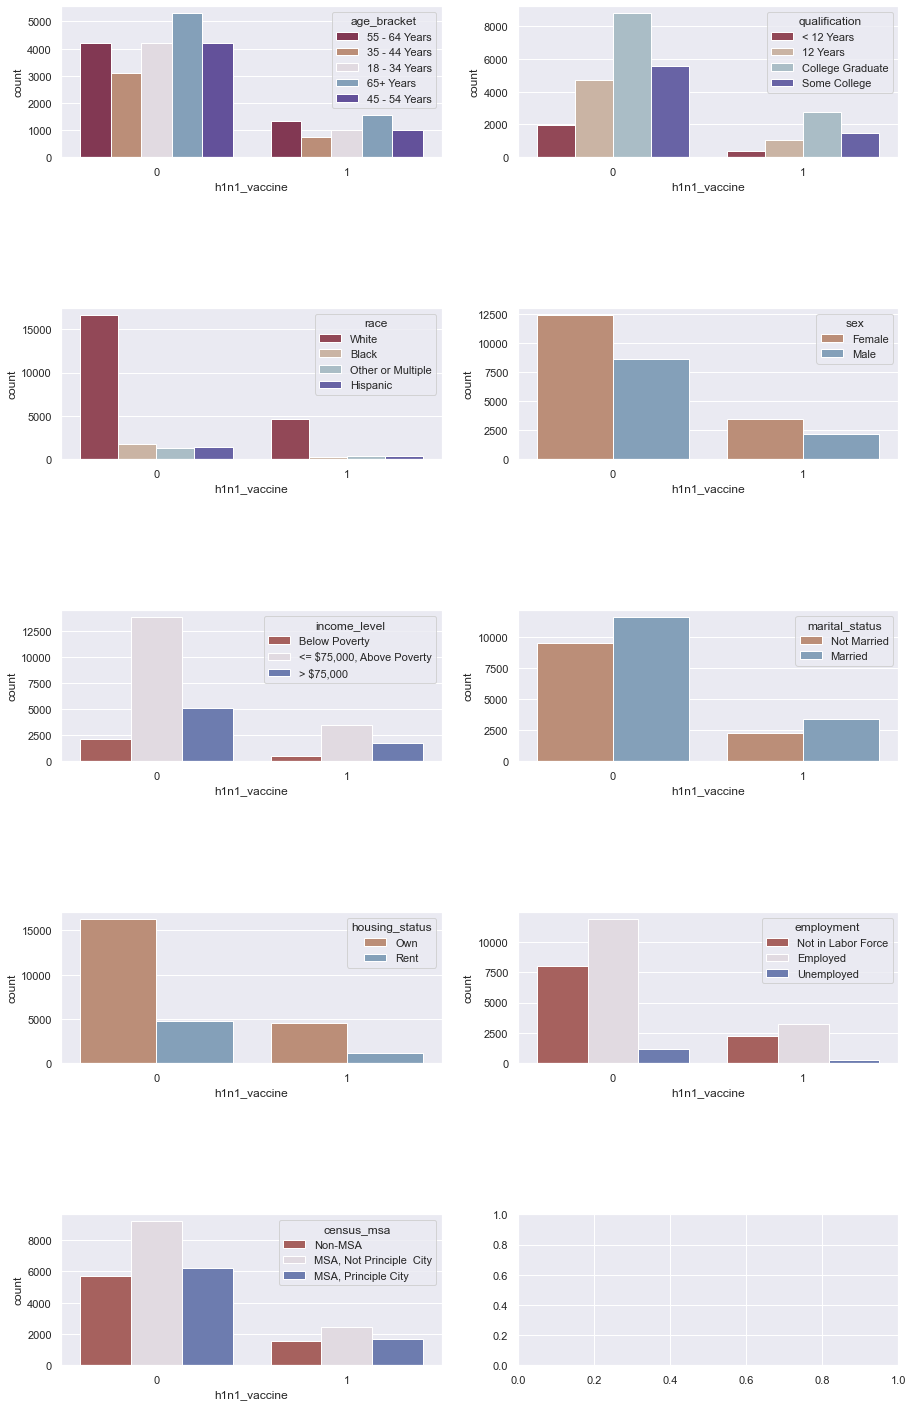

In [25]:
fig,axes= plt.subplots(5,2,figsize=(15, 25))
for i, cols in enumerate(cat_features):
    row, col= i//2, i%2
    sn.countplot(x='h1n1_vaccine', data=data, hue=cols, ax=axes[row, col], palette='twilight_shifted_r')
    
plt.subplots_adjust(hspace=1)

<AxesSubplot:>

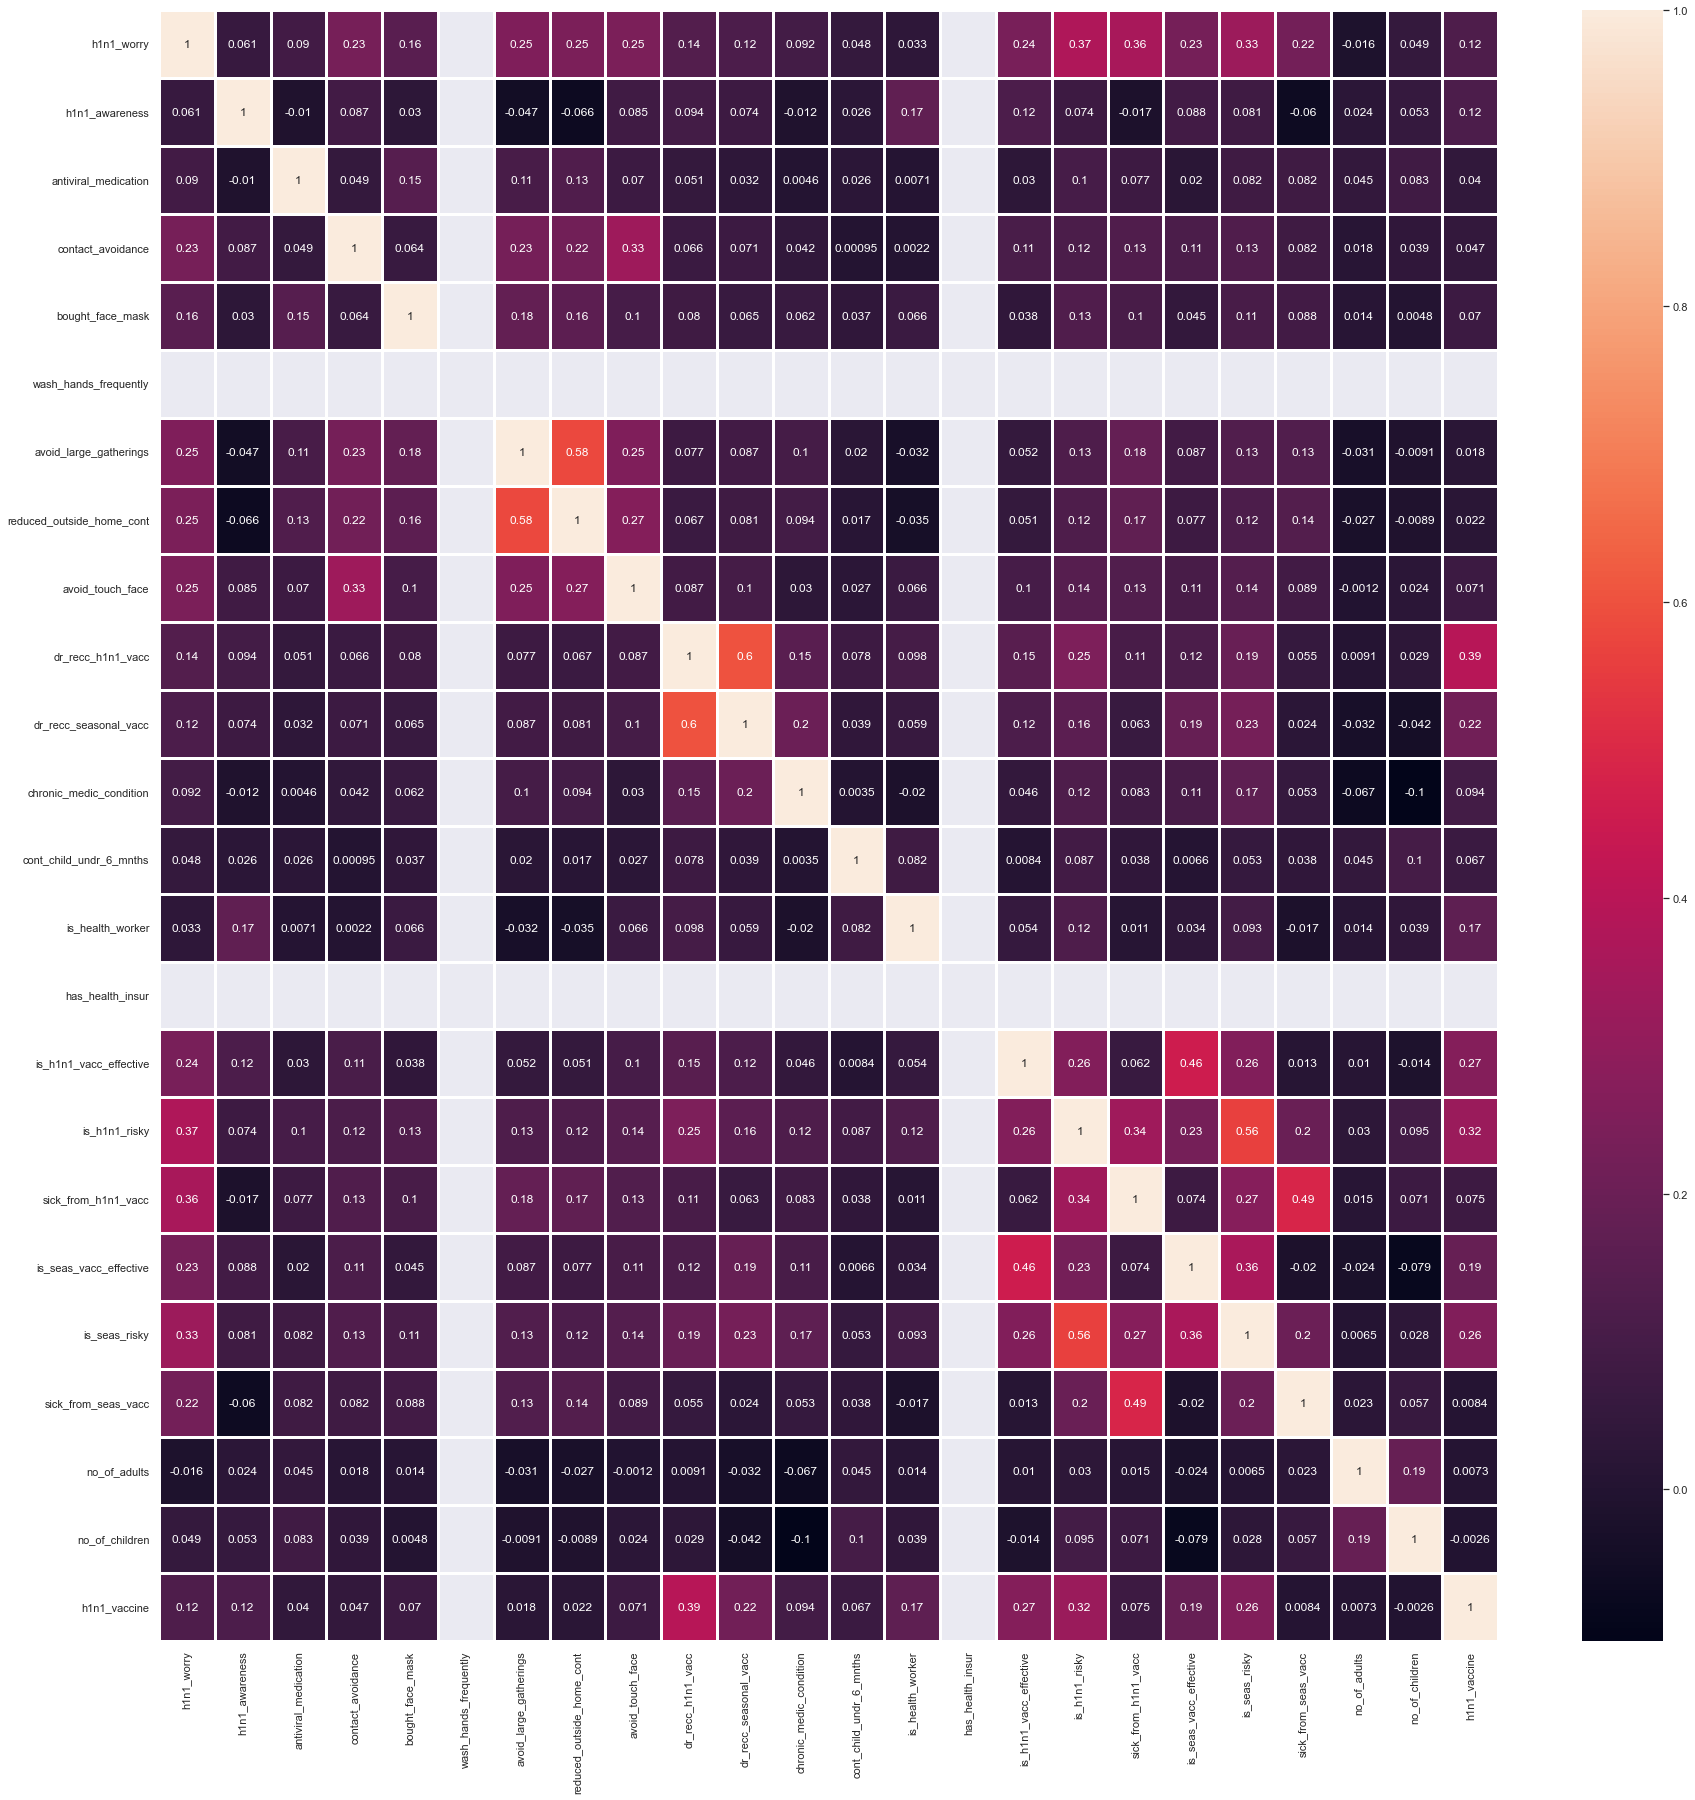

In [26]:
fig, ax= plt.subplots(figsize=(30, 30))
corr_matrix=data.corr()
sn.heatmap(corr_matrix, annot=True, linewidth=3, ax=ax)

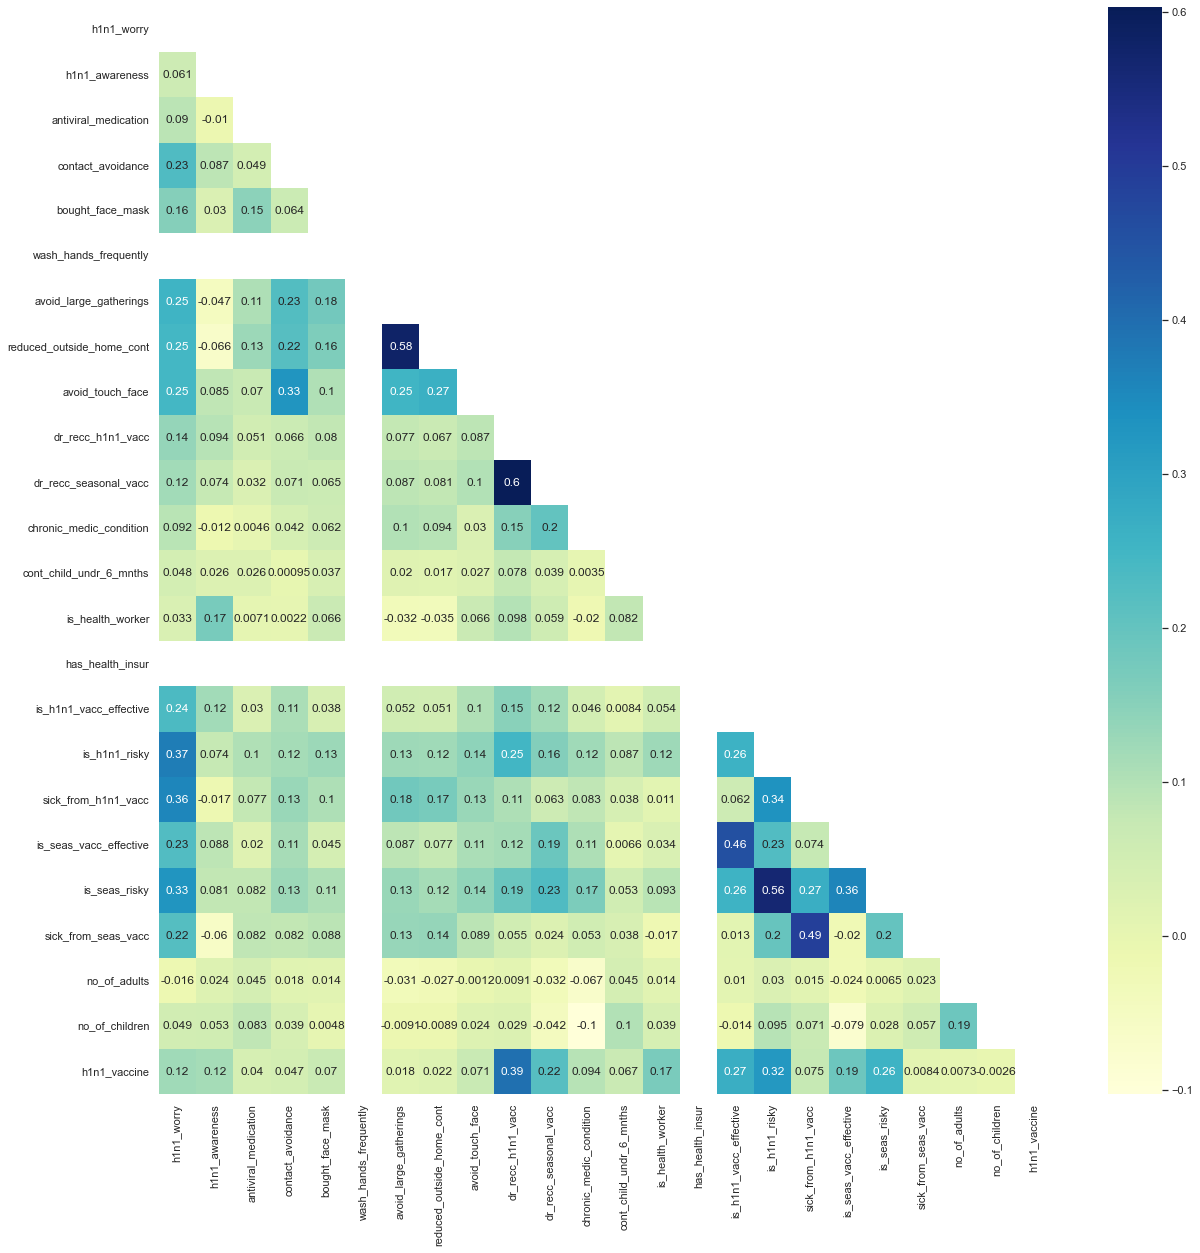

In [27]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,20))
    ax = sn.heatmap(corr_matrix,mask=mask,annot=True,cmap="YlGnBu")

In [28]:
for feat in cat_features.columns:
    print(f"\n",data[feat].value_counts())
    


 65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

 College Graduate    11504
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

 White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

 Female    15858
Male      10849
Name: sex, dtype: int64

 <= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

 Married        14963
Not Married    11744
Name: marital_status, dtype: int64

 Own     20778
Rent     5929
Name: housing_status, dtype: int64

 Employed              15023
Not in Labor Force    10231
Unemployed             1453
Name: employment, dtype: int64

 MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, 

In [29]:
df=pd.get_dummies(cat_features)
for feat in cat_features.columns:
    data.drop(feat, axis=1, inplace=True)
data=data.join(df)

In [30]:
data.head()

h1n1_worry  h1n1_awareness  antiviral_medication  contact_avoidance  \
0         1.0             0.0                   0.0                0.0   
1         3.0             2.0                   0.0                1.0   
2         1.0             1.0                   0.0                1.0   
3         1.0             1.0                   0.0                1.0   
4         2.0             1.0                   0.0                1.0   

   bought_face_mask  wash_hands_frequently  avoid_large_gatherings  \
0               0.0                    1.0                     0.0   
1               0.0                    1.0                     0.0   
2               0.0                    1.0                     0.0   
3               0.0                    1.0                     1.0   
4               0.0                    1.0                     1.0   

   reduced_outside_home_cont  avoid_touch_face  dr_recc_h1n1_vacc  ...  \
0                        1.0               1.0                0.0  ...   
1                        1.0               1.0                0.0  ...   
2                        0.0               0.0                0.0  ...   
3                        0.0               0.0                0.0  ...   
4                        0.0               1.0                0.0  ...   

   marital_status_Married  marital_status_Not Married  housing_status_Own  \
0                       0                           1                   1   
1                       0                           1                   0   
2                       0                           1                   1   
3                       0                           1                   0   
4                       1                           0                   1   

   housing_status_Rent  employment_Employed  employment_Not in Labor Force  \
0                    0                    0                              1   
1                    1                    1                              0   
2                    0                    1                              0   
3                    1                    0                              1   
4                    0                    1                              0   

   employment_Unemployed  census_msa_MSA, Not Principle  City  \
0                      0                                    0   
1                      0                                    1   
2                      0                                    1   
3                      0                                    0   
4                      0                                    1   

   census_msa_MSA, Principle City  census_msa_Non-MSA  
0                               0                   1  
1                               0                   0  
2                               0                   0  
3                               1                   0  
4                               0                   0  

[5 rows x 52 columns]

## Balancing Data

In [31]:
A = list(data.h1n1_vaccine).count(1)
B = list(data.h1n1_vaccine).count(0)
print("Count of 1<Vaccinated>: ",A,"\nCount of 0<Not_Vaccinated>: ",B)

fig = px.bar((A,B),x=["Vaccinated","Not_Vaccinated"],y=[A,B],color=[A,B])
fig.show()

Count of 1<Vaccinated>:  5674 
Count of 0<Not_Vaccinated>:  21033


In [32]:
df=data.copy()

In [33]:
X=df.drop(['h1n1_vaccine'], axis=1)
y=df[['h1n1_vaccine']]

In [34]:
# Down Sampling
under_sampler = RandomUnderSampler()
X_down, y_down = under_sampler.fit_resample(X, y)

In [35]:
# Over Sampling
os=RandomOverSampler()
X_over, y_over=os.fit_resample(X,y)

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=1)
X_down_train, X_down_test, y_down_train, y_down_test=train_test_split(X_down, y_down, test_size=0.20, random_state=1)
X_over_train, X_over_test, y_over_train, y_over_test=train_test_split(X_over, y_over, test_size=0.20, random_state=1)

## Feature Scaling

In [37]:
scaling= StandardScaler()

In [38]:
scaling.fit_transform(X)

array([[-0.68184881, -2.04427905, -0.22629268, ..., -0.87928249,
        -0.64602114,  1.64630987],
       [ 1.51837305,  1.19702709, -0.22629268, ...,  1.13729093,
        -0.64602114, -0.60741906],
       [-0.68184881, -0.42362598, -0.22629268, ...,  1.13729093,
        -0.64602114, -0.60741906],
       ...,
       [ 0.41826212,  1.19702709, -0.22629268, ...,  1.13729093,
        -0.64602114, -0.60741906],
       [-0.68184881, -0.42362598, -0.22629268, ..., -0.87928249,
        -0.64602114,  1.64630987],
       [-1.78195974, -2.04427905, -0.22629268, ..., -0.87928249,
         1.54793697, -0.60741906]])

## Model Building

In [39]:
logR= LogisticRegression(C=3.0, solver ='newton-cholesky' )
logR.fit(X_over_train, y_over_train)

LogisticRegression(C=3.0, solver='newton-cholesky')

In [40]:
logR.score(X_over_train, y_over_train)

0.7560323309164388

In [41]:
logR.score(X_over_test, y_over_test)

0.7596862372236748

<AxesSubplot:>

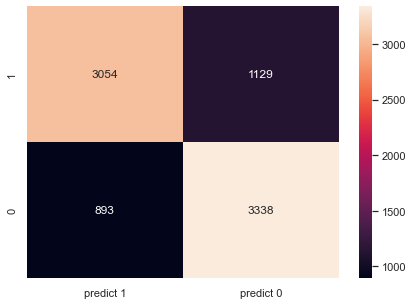

In [42]:
pred_lro=logR.predict(X_over_test)
cm=metrics.confusion_matrix(y_over_test, pred_lro, labels=[1,0])
df_cm=pd.DataFrame(cm, index=[i for i in ['1', '0']],
                  columns=[i for i in ['predict 1', 'predict 0']])
plt.figure(figsize=(7,5))
sn.heatmap(df_cm, annot=True, fmt='g')

In [44]:
print(sklearn.metrics.classification_report(y_over_test,pred_lro))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      4231
           1       0.77      0.73      0.75      4183

    accuracy                           0.76      8414
   macro avg       0.76      0.76      0.76      8414
weighted avg       0.76      0.76      0.76      8414



In [45]:
dt=DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)
dt.fit(X_over_train, y_over_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)

In [46]:
dt.score(X_over_train, y_over_train)

0.7581718768572447

In [47]:
dt.score(X_over_test, y_over_test)

0.7493463275493225

<AxesSubplot:>

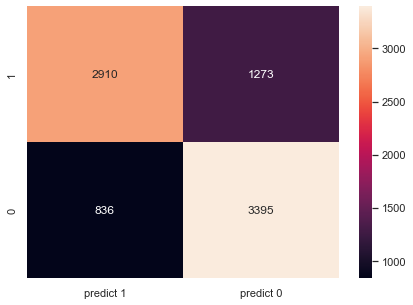

In [48]:
pred_dt=dt.predict(X_over_test)
cm=metrics.confusion_matrix(y_over_test, pred_dt, labels=[1,0])
df_cm=pd.DataFrame(cm, index=[i for i in ['1', '0']],
                  columns=[i for i in ['predict 1', 'predict 0']])
plt.figure(figsize=(7,5))
sn.heatmap(df_cm, annot=True, fmt='g')

In [49]:
bagging= BaggingClassifier(n_estimators=5, max_samples=0.1)
bagging.fit(X_over_train, y_over_train)

BaggingClassifier(max_samples=0.1, n_estimators=5)

In [50]:
bagging.score(X_over_train, y_over_train)

0.8042315464162606

In [51]:
bagging.score(X_over_test, y_over_test)

0.7678868552412645

<AxesSubplot:>

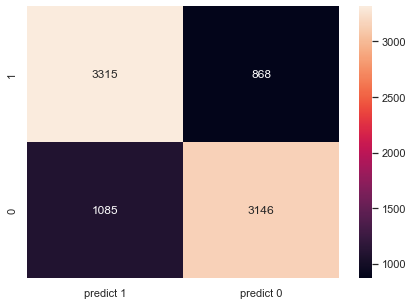

In [52]:
pred_bag=bagging.predict(X_over_test)
cm=metrics.confusion_matrix(y_over_test, pred_bag, labels=[1,0])
df_cm=pd.DataFrame(cm, index=[i for i in ['1', '0']],
                  columns=[i for i in ['predict 1', 'predict 0']])
plt.figure(figsize=(7,5))
sn.heatmap(df_cm, annot=True, fmt='g')

In [53]:
print(sklearn.metrics.classification_report(y_over_test,pred_bag))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      4231
           1       0.75      0.79      0.77      4183

    accuracy                           0.77      8414
   macro avg       0.77      0.77      0.77      8414
weighted avg       0.77      0.77      0.77      8414



In [54]:
ada=AdaBoostClassifier(algorithm='SAMME', n_estimators=100, learning_rate=0.5)
ada.fit(X_over_train, y_over_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=100)

In [55]:
ada.score(X_over_train, y_over_train)

0.7547248306192796

In [56]:
ada.score(X_over_test, y_over_test)

0.7544568576182553

<AxesSubplot:>

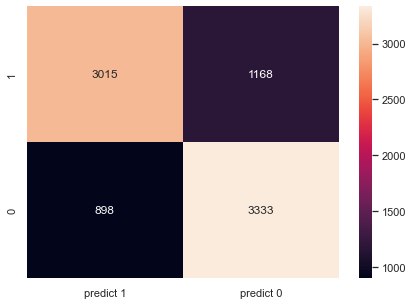

In [57]:
pred_ada=ada.predict(X_over_test)
cm=metrics.confusion_matrix(y_over_test, pred_ada, labels=[1,0])
df_cm=pd.DataFrame(cm, index=[i for i in ['1', '0']],
                  columns=[i for i in ['predict 1', 'predict 0']])
plt.figure(figsize=(7,5))
sn.heatmap(df_cm, annot=True, fmt='g')

In [58]:
print(sklearn.metrics.classification_report(y_over_test,pred_ada))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      4231
           1       0.77      0.72      0.74      4183

    accuracy                           0.75      8414
   macro avg       0.76      0.75      0.75      8414
weighted avg       0.76      0.75      0.75      8414



In [59]:
grad=GradientBoostingClassifier(learning_rate=0.5, n_estimators=50)
grad.fit(X_over_train, y_over_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=50)

In [60]:
grad.score(X_over_train, y_over_train)

0.7768929038392963

In [61]:
grad.score(X_over_test, y_over_test)

0.7700261468980271

<AxesSubplot:>

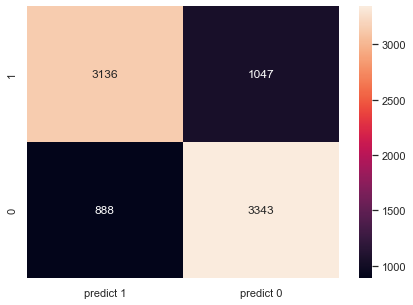

In [62]:
pred_gr=grad.predict(X_over_test)
cm=metrics.confusion_matrix(y_over_test, pred_gr, labels=[1,0])
df_cm=pd.DataFrame(cm, index=[i for i in ['1', '0']],
                  columns=[i for i in ['predict 1', 'predict 0']])
plt.figure(figsize=(7,5))
sn.heatmap(df_cm, annot=True, fmt='g')

In [63]:
print(sklearn.metrics.classification_report(y_over_test,pred_gr))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      4231
           1       0.78      0.75      0.76      4183

    accuracy                           0.77      8414
   macro avg       0.77      0.77      0.77      8414
weighted avg       0.77      0.77      0.77      8414



In [64]:
rf=RandomForestClassifier(n_estimators=150, criterion='log_loss',max_depth=7)
rf.fit(X_over_train, y_over_train)

RandomForestClassifier(criterion='log_loss', max_depth=7, n_estimators=150)

In [65]:
rf.score(X_over_train, y_over_train)

0.7684832996552954

In [66]:
rf.score(X_over_test, y_over_test)

0.7583788923223199

<AxesSubplot:>

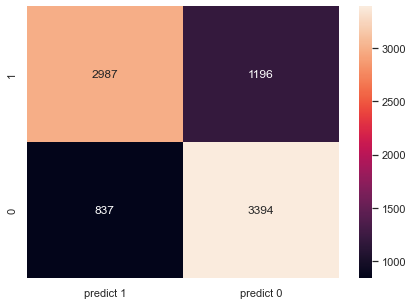

In [67]:
pred_rf=rf.predict(X_over_test)
cm=metrics.confusion_matrix(y_over_test, pred_rf, labels=[1,0])
df_cm=pd.DataFrame(cm, index=[i for i in ['1', '0']],
                  columns=[i for i in ['predict 1', 'predict 0']])
plt.figure(figsize=(7,5))
sn.heatmap(df_cm, annot=True, fmt='g')

In [68]:
print(sklearn.metrics.classification_report(y_over_test,pred_rf))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      4231
           1       0.78      0.71      0.75      4183

    accuracy                           0.76      8414
   macro avg       0.76      0.76      0.76      8414
weighted avg       0.76      0.76      0.76      8414



In [ ]:
svm= SVC(kernel='linear', C=5)
svm.fit(X_over_train, y_over_train)

In [ ]:
svm.score(X_over_train, y_over_train)

In [ ]:
svm.score(X__over_test, y_over_test)

In [ ]:
pred_svm=logR.predict(X_over_test)
cm=metrics.confusion_matrix(y_over_test, pred_svm, labels=[1,0])
df_cm=pd.DataFrame(cm, index=[i for i in ['1', '0']],
                  columns=[i for i in ['predict 1', 'predict 0']])
plt.figure(figsize=(7,5))
sn.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
print(sklearn.metrics.classification_report(y_over_test,pred_svm))

#### Therefore, from the models we have figured out that the GradiantBoosting model gives best results, with the upscaleed dataset